<a href="https://colab.research.google.com/github/seremmartin64-ops/CIFAR-10-DATASET/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# collect dataset from kaggle
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"seremmartin","key":"38ac1d525fc6cfc5ae8baf08a4da9ec1"}'}

In [46]:
import os

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [28]:
# Download the plant disease dataset
!kaggle datasets download -d abdallahalidev/plantvillage-dataset
!unzip -q plantvillage-dataset.zip -d /content/plant_dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.03G/2.04G [00:38<00:00, 268MB/s]
100% 2.04G/2.04G [00:38<00:00, 56.3MB/s]


In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

In [6]:
# 1. Dataset paths ---
data_dir = '/content/plant_dataset/plantvillage dataset'


In [29]:
# --- 2. Data generators ---
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [30]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)


Found 130333 images belonging to 3 classes.


In [31]:
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)


Found 32583 images belonging to 3 classes.


In [51]:
# Define a mapping from folder names to disease names
disease_mapping = {
    'color': 'Healthy',
    'grayscale': 'Bacterial_Blight',
    'segmented': 'Leaf_Spot'
}

num_classes = len(train_generator.class_indices)
class_names = [disease_mapping.get(name, name) for name in train_generator.class_indices.keys()]
print("Classes:", class_names)

Classes: ['Healthy', 'Bacterial_Blight', 'Leaf_Spot']


In [52]:
# Building a model

model = models.Sequential([
    layers.Input(shape=(64, 64, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,587 (2.61 MB)

 Trainable params: 683,587 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
history = model.fit(
    train_generator,
    steps_per_epoch=500, # Reduced for faster execution
    validation_data=validation_generator,
    validation_steps=100, # Reduced for faster execution
    epochs=10
)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.9905 - loss: 0.0503

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


500/500 ━━━━━━━━━━━━━━━━━━━━ 279s 558ms/step - accuracy: 0.9905 - loss: 0.0503 - val_accuracy: 0.9137 - val_loss: 0.3728
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 269s 537ms/step - accuracy: 0.9944 - loss: 0.0247 - val_accuracy: 0.9175 - val_loss: 0.3613
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 324s 648ms/step - accuracy: 0.9955 - loss: 0.0221 - val_accuracy: 0.9194 - val_loss: 0.3107
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 266s 531ms/step - accuracy: 0.9924 - loss: 0.0328 - val_accuracy: 0.9148 - val_loss: 0.3108
Epoch 5/10
 37/500 ━━━━━━━━━━━━━━━━━━━━ 3:55 509ms/step - accuracy: 0.9968 - loss: 0.0137

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


500/500 ━━━━━━━━━━━━━━━━━━━━ 81s 160ms/step - accuracy: 0.9966 - loss: 0.0161 - val_accuracy: 0.9175 - val_loss: 0.2589
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 274s 548ms/step - accuracy: 0.9969 - loss: 0.0135 - val_accuracy: 0.9181 - val_loss: 0.2473
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 321s 642ms/step - accuracy: 0.9963 - loss: 0.0152 - val_accuracy: 0.9206 - val_loss: 0.2314
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 322s 644ms/step - accuracy: 0.9980 - loss: 0.0107 - val_accuracy: 0.9161 - val_loss: 0.2881
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 274s 547ms/step - accuracy: 0.9980 - loss: 0.0100 - val_accuracy: 0.9250 - val_loss: 0.2991
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - accuracy: 0.9974 - loss: 0.0165 - val_accuracy: 0.9158 - val_loss: 0.3092


In [53]:
# evaluate the model
scores = model.evaluate(validation_generator)
print(f"\nTest Loss: {scores[0]:.4f}")
print(f"Test Accuracy: {scores[1]*100:.2f}%")



510/510 ━━━━━━━━━━━━━━━━━━━━ 126s 246ms/step - accuracy: 0.3352 - loss: 1.1105

Test Loss: 1.1109
Test Accuracy: 33.32%


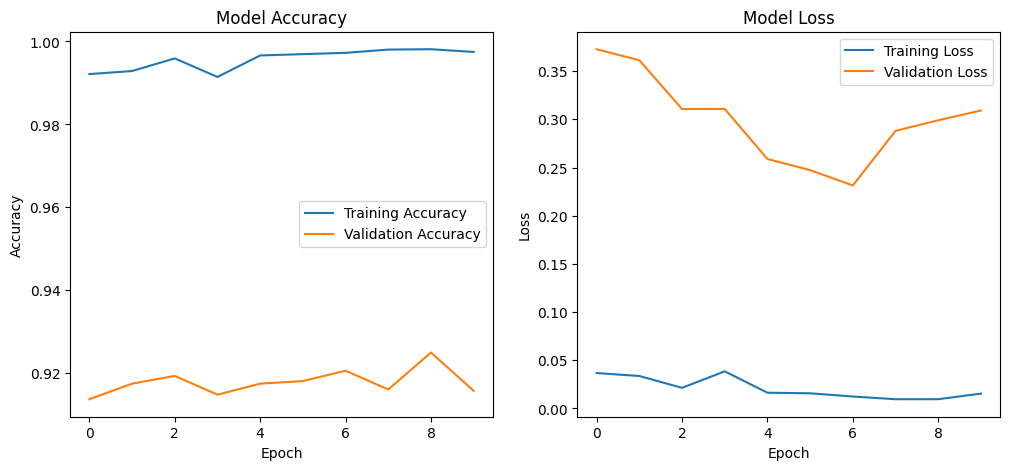

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

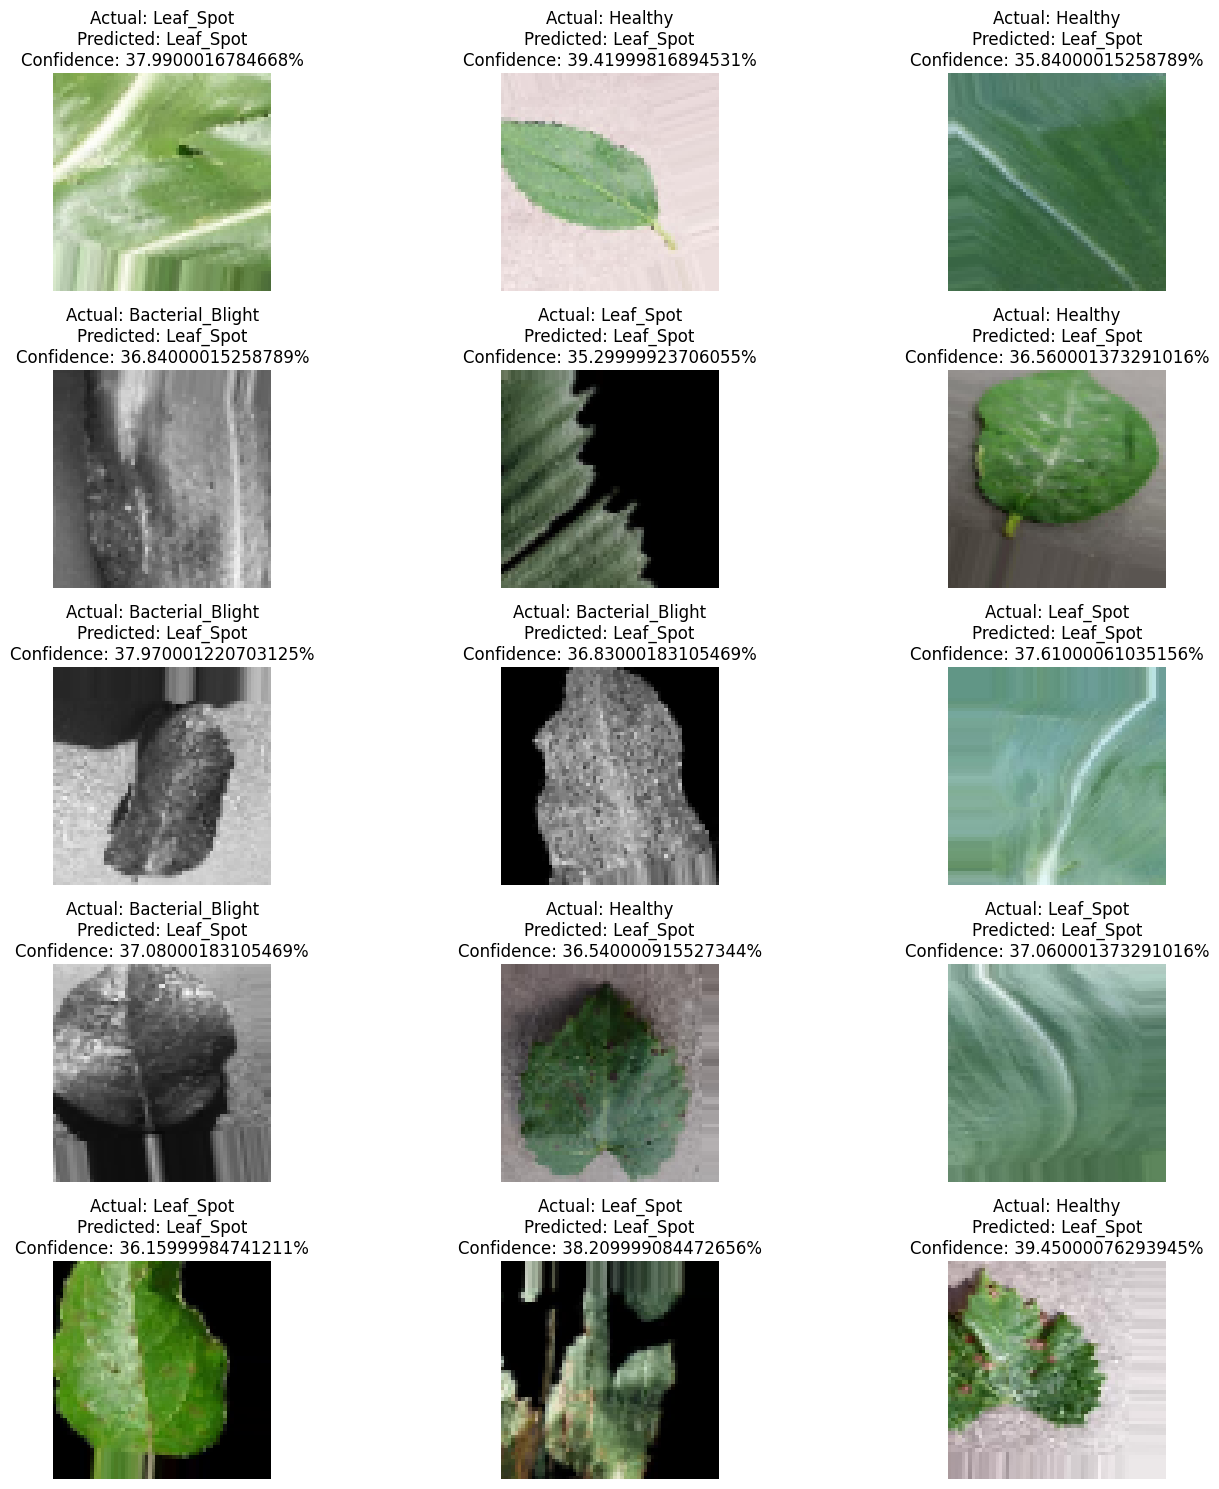

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Get images from validation generator
x_batch, y_batch = next(validation_generator)

plt.figure(figsize=(15, 15))
for i in range(15):
    ax = plt.subplot(5, 3, i + 1)
    img = x_batch[i]

    # Get actual label
    actual_idx = int(np.argmax(y_batch[i]))
    actual_label = class_names[actual_idx]

    # Get prediction
    img_array = tf.expand_dims(img, 0)
    predictions = model.predict(img_array, verbose=0)[0]
    predicted_label = class_names[np.argmax(predictions)]
    confidence = round(100 * np.max(predictions), 2)

    plt.imshow(img)
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}\nConfidence: {confidence}%")
    plt.axis("off")

plt.tight_layout()
plt.show()